# Topological Data Analysis

## Software and tools for TDA 

Created by: **Maslennikova E.,**
**18 MAG IAD, programmers group**


# 1. C++ and Python package Dionysus

[Official site](https://mrzv.org/software/dionysus2/), [Github repository](https://github.com/mrzv/dionysus)

### Installation process is very simply, just using pip

In [1]:
!pip install -U dionysus

DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7. More details about Python 2 support in pip, can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support
Requirement already up-to-date: dionysus in /Users/elizavetamaslennikova/opt/anaconda2/lib/python2.7/site-packages (2.0.6)


## Official site:

<img src="images/site.png">

## Welcome to documentation!
<img src="images/documentation.png">

In [2]:
import dionysus

In [3]:
import numpy as np
import matplotlib.pyplot as plt

## Let's strat with Simplex class

In [4]:
simplex = dionysus.Simplex([0,1,2], 3)
simplex

<0,1,2> 3

In [5]:
simplex.dimension()

2

We can iterate over the vertices of the simplex or over the boundary:

In [6]:
for v in simplex:
    print(v)

0
1
2


In [7]:
for sb in simplex.boundary():
    print(sb)

<1,2> 0
<0,2> 0
<0,1> 0


Simplices can store optional data, and the 0 reported after each boundary edge is the default value of the data:

In [8]:
simplex.data = 5
print(simplex)

<0,1,2> 5


We can use **closure()** to generate all faces of a set of simplices. 

In [9]:
dionysus.closure([simplex], 0)

[<0> 0, <1> 0, <2> 0]

In [10]:
dionysus.closure([simplex], 1)

[<0,2> 0, <0,1> 0, <1,2> 0, <0> 0, <1> 0, <2> 0]

In [11]:
dionysus.closure([simplex], 2)

[<0,2> 0, <0,1> 0, <1,2> 0, <0> 0, <1> 0, <2> 0, <0,1,2> 0]

### Filtration

Without data:

In [12]:
simplices = [[0], [1], [2], [1,2], [0,2], [0,1]]
filtr = dionysus.Filtration()
for vertices in simplices:
    filtr.append(dionysus.Simplex(vertices))
for s in filtr:
    print(s)

<0> 0
<1> 0
<2> 0
<1,2> 0
<0,2> 0
<0,1> 0


In [13]:
filtr.sort()
for s in filtr:
    print(s)

<0> 0
<1> 0
<2> 0
<0,1> 0
<0,2> 0
<1,2> 0


<img src="images/filtration.png">

With data:

In [14]:
simplices = [([2], 4), ([1,2], 5), ([0,2], 6), ([0], 1), ([1], 2), ([0,1], 3)]
filtr = dionysus.Filtration()
for vertices, time in simplices:
    filtr.append(dionysus.Simplex(vertices, time))
for s in filtr:
    print(s)

<2> 4
<1,2> 5
<0,2> 6
<0> 1
<1> 2
<0,1> 3


In [15]:
filtr.sort()
for s in filtr:
    print(s)

<0> 1
<1> 2
<0,1> 3
<2> 4
<1,2> 5
<0,2> 6


<img src="images/filtration2.png">

Also we can find index of element in filtration:

In [16]:
print(filtr.index(dionysus.Simplex([1,2])))

4


### Persisteme homology 

**Persistence barcode**: we use **homology_persistence()**, which returns its internal representation of the reduced boundary matrix:

In [17]:
homology = dionysus.homology_persistence(filtr)
homology

Reduced matrix with 6 columns

In [18]:
dgms = dionysus.init_diagrams(homology, filtr)
print(dgms)

[Diagram with 3 points, Diagram with 1 points]


<img src="images/homology.png">

In [19]:
for i, dgm in enumerate(dgms):
    for pt in dgm:
        print(i, pt.birth, pt.death)

(0, 1.0, inf)
(0, 2.0, 3.0)
(0, 4.0, 5.0)
(1, 6.0, inf)


### Distances between  a pair of persistence diagrams

**wasserstein_distance()** computes q-th Wasserstein distance between a pair of persistence diagrams. **bottleneck_distance()** computes the bottleneck distance.

In [27]:
import numpy as np
# points dimensation distance
f1 = dionysus.fill_rips(np.random.random((20, 2)), 2, 1)
f1

Filtration with 1331 simplices

In [28]:
m1 = dionysus.homology_persistence(f1)
m1

Reduced matrix with 1331 columns

In [29]:
dgms1 = dionysus.init_diagrams(m1, f1)
dgms1

[Diagram with 20 points, Diagram with 4 points, Diagram with 952 points]

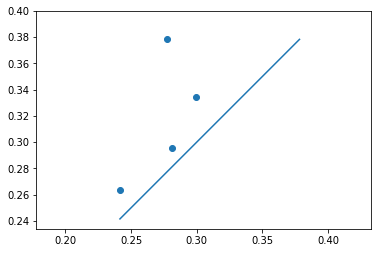

In [30]:
dionysus.plot.plot_diagram(dgms1[1], show = True)

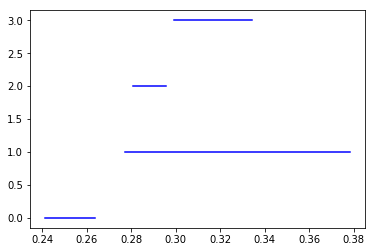

In [31]:
dionysus.plot.plot_bars(dgms1[1], show = True)

In [32]:
f2 = dionysus.fill_rips(np.random.random((20, 2)), 2, 1)
f2

Filtration with 1313 simplices

In [33]:
m2 = dionysus.homology_persistence(f2)
m2

Reduced matrix with 1313 columns

In [34]:
dgms2 = dionysus.init_diagrams(m2, f2)
dgms2

[Diagram with 20 points, Diagram with 5 points, Diagram with 936 points]

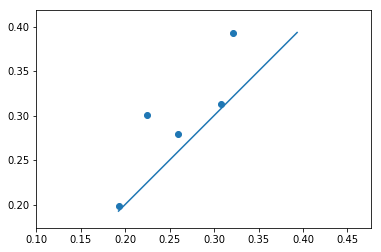

In [35]:
dionysus.plot.plot_diagram(dgms2[1], show = True)

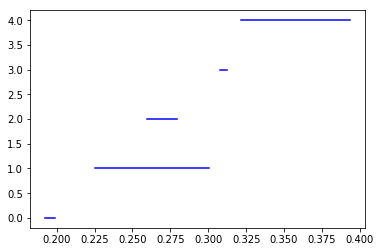

In [36]:
dionysus.plot.plot_bars(dgms2[1], show = True)

In [37]:
wdist = dionysus.wasserstein_distance(dgms1[1], dgms2[1], q=2)
print("2-Wasserstein distance between 1-dimensional persistence diagrams:", wdist)

('2-Wasserstein distance between 1-dimensional persistence diagrams:', 0.061471495777368546)


In [38]:
bdist = dionysus.bottleneck_distance(dgms1[1], dgms2[1])
print("Bottleneck distance between 1-dimensional persistence diagrams:", bdist)

('Bottleneck distance between 1-dimensional persistence diagrams:', 0.04455181211233139)


## Mistake in documentation!
<img src="images/mistake.png">

In [39]:
simplices = [[0], [1], [0,1], [2]]
f = dionysus.Filtration(simplices)
f.sort()
m = dionysus.homology_persistence(f)

In [40]:
m.homologous(d.Chain([(1,0)]), d.Chain([(1,1)]))

AttributeError: 'dionysus._dionysus.ReducedMatrix' object has no attribute 'homologous'

<img src="images/mistake2.png">

### Vietoris–Rips Complexes 

We can construct complex from coordinates of points or from distance matrices:

In [41]:
points = np.random.random((100,2))
f = dionysus.fill_rips(points, 2, .3)
f

Filtration with 5557 simplices

In [42]:
for s in f:
    print(s)

<0> 0
<1> 0
<2> 0
<3> 0
<4> 0
<5> 0
<6> 0
<7> 0
<8> 0
<9> 0
<10> 0
<11> 0
<12> 0
<13> 0
<14> 0
<15> 0
<16> 0
<17> 0
<18> 0
<19> 0
<20> 0
<21> 0
<22> 0
<23> 0
<24> 0
<25> 0
<26> 0
<27> 0
<28> 0
<29> 0
<30> 0
<31> 0
<32> 0
<33> 0
<34> 0
<35> 0
<36> 0
<37> 0
<38> 0
<39> 0
<40> 0
<41> 0
<42> 0
<43> 0
<44> 0
<45> 0
<46> 0
<47> 0
<48> 0
<49> 0
<50> 0
<51> 0
<52> 0
<53> 0
<54> 0
<55> 0
<56> 0
<57> 0
<58> 0
<59> 0
<60> 0
<61> 0
<62> 0
<63> 0
<64> 0
<65> 0
<66> 0
<67> 0
<68> 0
<69> 0
<70> 0
<71> 0
<72> 0
<73> 0
<74> 0
<75> 0
<76> 0
<77> 0
<78> 0
<79> 0
<80> 0
<81> 0
<82> 0
<83> 0
<84> 0
<85> 0
<86> 0
<87> 0
<88> 0
<89> 0
<90> 0
<91> 0
<92> 0
<93> 0
<94> 0
<95> 0
<96> 0
<97> 0
<98> 0
<99> 0
<1,61> 0.00757889
<54,65> 0.00948036
<20,27> 0.0120991
<3,57> 0.01253
<9,23> 0.0137251
<21,62> 0.016745
<36,68> 0.0205672
<0,76> 0.0248763
<7,48> 0.0261442
<3,10> 0.0267385
<39,89> 0.0298661
<72,82> 0.0300246
<8,65> 0.0301533
<8,54> 0.0309216
<8,54,65> 0.0309216
<38,92> 0.0314769
<31,96> 0.031986
<12,47> 0.03

<33,61,87> 0.183657
<33,79,87> 0.183657
<33,87,90> 0.183657
<33,87,96> 0.183657
<35,74> 0.184296
<75,77> 0.185188
<5,75,77> 0.185188
<30,75,77> 0.185188
<43,75,77> 0.185188
<66,75,77> 0.185188
<74,75,77> 0.185188
<40,64> 0.185506
<12,40,64> 0.185506
<40,47,64> 0.185506
<40,53,64> 0.185506
<5,43> 0.186
<5,43,66> 0.186
<5,43,74> 0.186
<5,43,75> 0.186
<5,43,77> 0.186
<23,92> 0.186421
<9,23,92> 0.186421
<19,23,92> 0.186421
<23,29,92> 0.186421
<23,56,92> 0.186421
<23,80,92> 0.186421
<23,81,92> 0.186421
<23,92,95> 0.186421
<23,92,99> 0.186421
<15,47> 0.186617
<12,15,47> 0.186617
<15,36,47> 0.186617
<15,40,47> 0.186617
<15,47,53> 0.186617
<15,47,68> 0.186617
<43,59> 0.186784
<5,43,59> 0.186784
<43,59,66> 0.186784
<43,59,74> 0.186784
<43,59,77> 0.186784
<23,38> 0.187522
<9,23,38> 0.187522
<23,29,38> 0.187522
<23,38,56> 0.187522
<23,38,80> 0.187522
<23,38,81> 0.187522
<23,38,92> 0.187522
<23,38,95> 0.187522
<4,39> 0.187608
<4,13,39> 0.187608
<4,19,39> 0.187608
<4,29,39> 0.187608
<4,34,39> 0.187

<7,71,73> 0.23613
<7,71,85> 0.23613
<49,52> 0.236274
<49,52,72> 0.236274
<49,52,82> 0.236274
<49,52,84> 0.236274
<49,52,91> 0.236274
<4,92> 0.236627
<4,9,92> 0.236627
<4,13,92> 0.236627
<4,19,92> 0.236627
<4,23,92> 0.236627
<4,29,92> 0.236627
<4,34,92> 0.236627
<4,56,92> 0.236627
<4,80,92> 0.236627
<4,81,92> 0.236627
<4,92,95> 0.236627
<4,92,99> 0.236627
<63,83> 0.237468
<0,63,83> 0.237468
<54,63,83> 0.237468
<63,65,83> 0.237468
<63,72,83> 0.237468
<63,76,83> 0.237468
<63,83,88> 0.237468
<46,74> 0.237841
<25,46,74> 0.237841
<35,46,74> 0.237841
<46,59,74> 0.237841
<2,83> 0.238251
<0,2,83> 0.238251
<2,63,83> 0.238251
<2,72,83> 0.238251
<2,76,83> 0.238251
<2,83,88> 0.238251
<33,57> 0.238742
<1,33,57> 0.238742
<20,33,57> 0.238742
<27,33,57> 0.238742
<33,57,61> 0.238742
<33,57,87> 0.238742
<23,49> 0.238779
<4,23,49> 0.238779
<23,49,50> 0.238779
<34,95> 0.239461
<4,34,95> 0.239461
<9,34,95> 0.239461
<13,34,95> 0.239461
<19,34,95> 0.239461
<23,34,95> 0.239461
<29,34,95> 0.239461
<34,56,95> 0.

<1,3,90> 0.270485
<3,18,90> 0.270485
<3,20,90> 0.270485
<3,27,90> 0.270485
<3,32,90> 0.270485
<3,33,90> 0.270485
<3,57,90> 0.270485
<3,61,90> 0.270485
<3,86,90> 0.270485
<3,87,90> 0.270485
<51,83> 0.270486
<0,51,83> 0.270486
<2,51,83> 0.270486
<42,51,83> 0.270486
<51,54,83> 0.270486
<51,63,83> 0.270486
<51,72,83> 0.270486
<51,76,83> 0.270486
<51,82,83> 0.270486
<51,83,88> 0.270486
<10,48> 0.270715
<3,10,48> 0.270715
<10,18,48> 0.270715
<10,24,48> 0.270715
<10,28,48> 0.270715
<10,32,48> 0.270715
<10,37,48> 0.270715
<10,48,57> 0.270715
<10,48,67> 0.270715
<10,48,69> 0.270715
<10,48,73> 0.270715
<10,48,85> 0.270715
<10,48,86> 0.270715
<36,85> 0.271125
<15,36,85> 0.271125
<24,36,85> 0.271125
<36,40,85> 0.271125
<36,53,85> 0.271125
<36,68,85> 0.271125
<36,69,85> 0.271125
<36,71,85> 0.271125
<36,73,85> 0.271125
<2,8> 0.271369
<0,2,8> 0.271369
<2,8,54> 0.271369
<2,8,63> 0.271369
<2,8,65> 0.271369
<2,8,72> 0.271369
<2,8,82> 0.271369
<2,8,83> 0.271369
<2,8,88> 0.271369
<2,8,91> 0.271369
<11,73>

<18,24,67> 0.299842
<18,24,69> 0.299842
<18,24,85> 0.299842
<18,24,86> 0.299842
<2,28> 0.299888
<0,2,28> 0.299888
<2,7,28> 0.299888
<2,18,28> 0.299888
<2,28,42> 0.299888
<2,28,44> 0.299888
<2,28,48> 0.299888
<2,28,51> 0.299888
<2,28,60> 0.299888
<2,28,76> 0.299888
<2,28,86> 0.299888
<2,28,97> 0.299888


In [43]:
from scipy.spatial.distance import pdist
dists = pdist(points)
f = dionysus.fill_rips(dists, 2, .3)
f

Filtration with 5557 simplices

### Cohomology Persistence 

[Reference to theoretical material](https://link.springer.com/article/10.1007%2Fs00454-011-9344-x)

In [61]:
simplices = [([2], 4), ([1,2], 5), ([0,2], 6), ([0], 1), ([1], 2), ([0,1], 3)]
f = dionysus.Filtration()
for vertices, time in simplices:
    f.append(dionysus.Simplex(vertices, time))
f

Filtration with 6 simplices

In [63]:
f.sort()
p = dionysus.cohomology_persistence(f, prime=2)
p

Cohomology persistence of 6 cells

In [64]:
dgms = dionysus.init_diagrams(p, f)
for i,dgm in enumerate(dgms):
    for pt in dgm:
        print(i, pt)

(0, (1,inf))
(0, (2,3))
(0, (4,5))
(1, (6,inf))


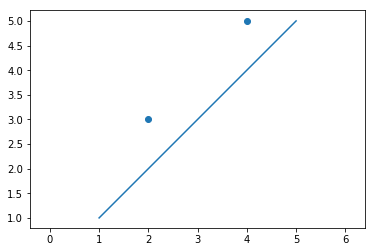

In [69]:
dionysus.plot.plot_diagram(dgms[0], show = True)

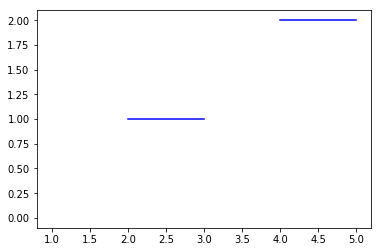

In [70]:
dionysus.plot.plot_bars(dgms[0], show = True)

### Circular Coordinates 

Every 1-dimensional cocycle (over integer coefficients) corresponds to a map from the space to a circle. [Persistent Cohomology and Circular Coordinates](https://link.springer.com/article/10.1007%2Fs00454-011-9344-x) outlines a methodology for computing a map from a point set to a circle that represents a persistent cocycle in the data. This section sketches an example of how to use Dionysus to compute such a map.

As our sample, we generate 100 points on an annulus:

In [71]:
points = np.random.normal(size = (100,2))
for i in range(points.shape[0]):
    points[i] = points[i] / np.linalg.norm(points[i], ord=2) * np.random.uniform(1,1.5)

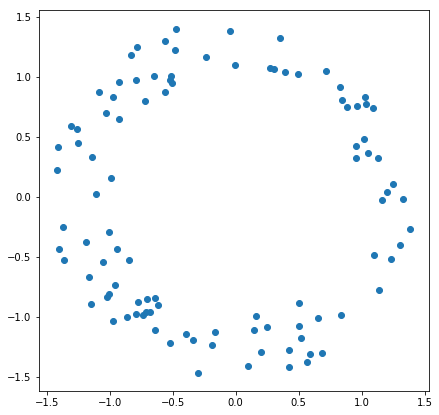

In [72]:
plt.figure(figsize=(7,7))
plt.scatter(points[:,0], points[:,1])
plt.show()

In [73]:
f = dionysus.fill_rips(points, 2, 2.)
p = dionysus.cohomology_persistence(f, 11, True)
dgms = dionysus.init_diagrams(p, f)
dgms

[Diagram with 100 points, Diagram with 13 points, Diagram with 41932 points]

The 0-dimensional and 1-dimensional barcodes, plotted below using the built-in Plotting functionality, reflects that we’ve sampled an annulus:

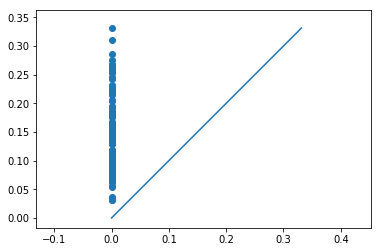

In [74]:
dionysus.plot.plot_diagram(dgms[0], show = True)

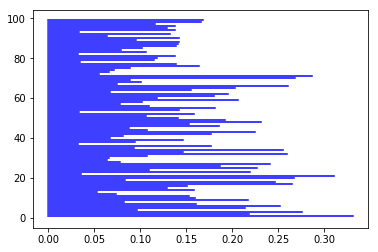

In [75]:
dionysus.plot.plot_bars(dgms[0], show = True)

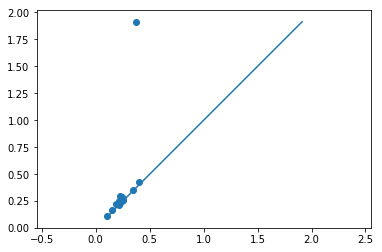

In [76]:
dionysus.plot.plot_diagram(dgms[1], show = True)

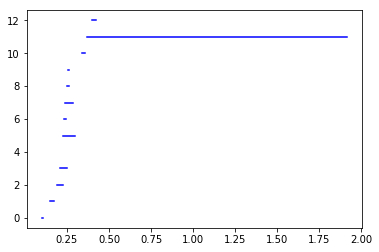

In [77]:
dionysus.plot.plot_bars(dgms[1], show = True)

We select the longest bar and take its corresponding cocycle:

In [78]:
pt = max(dgms[1], key = lambda pt: pt.death - pt.birth)
pt

(0.369216,1.91297)

In [79]:
cocycle = p.cocycle(pt.data)
f_restricted = dionysus.Filtration([s for s in f if s.data <= (pt.death + pt.birth)/2])
vertex_values = dionysus.smooth(f_restricted, cocycle, 11)

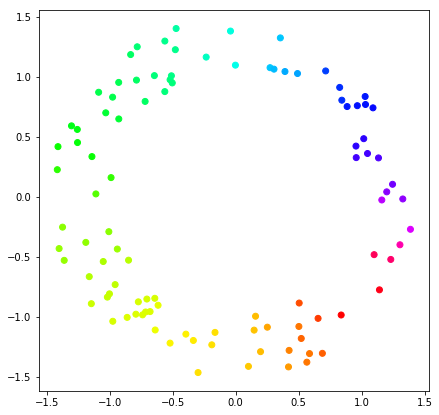

In [80]:
plt.figure(figsize=(7,7))
plt.scatter(points[:,0], points[:,1], c = vertex_values, cmap = 'hsv')
plt.show()

When the diagram is very dense, it’s often convenient to look at the histogram of point density

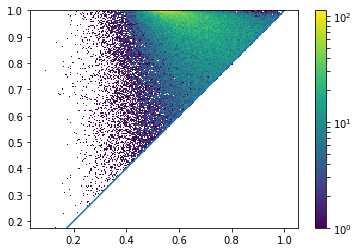

In [81]:
a = np.random.random((800,800))
f_lower_star = dionysus.fill_freudenthal(a)
p = dionysus.homology_persistence(f_lower_star)
dgms = dionysus.init_diagrams(p, f_lower_star)
dionysus.plot.plot_diagram_density(dgms[1], show = True)

## Summary:

**Documentation**: **5**/5

**Tutorial**: **5**/5

**Functionality**: **4**/5

**Advanatges** | **Disadvantages**
-|-
Powerful documentation and tutorial | Mistackes in tutorial
Detailed indexes |
Realization of simplex, filtration, Vietoris-Rips complex | Can not build Alpha Complex
Realization of Persistent Homology, Diagram Distances, Homologous Cycles |
Realization of different type of Persistence (Omni-field, Cohomology, Zigzag) |
Different type of distance's function | 
Calculate Bar codes and diagramms and vizualize them by internal implementation | Can not vizualize **simplex** by internal implementation 
Code is maintained constantly |

## Possitive impression! We recommend to use :)

# Thank you for the attention!